In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [29]:
file = 'test_planning_data.csv'

# Load the data set into a pandas DataFrame
df = pd.read_csv(file)

# Drop unnecessary columns
df = df.drop(['Region', 'Local planning authority', 'ONS code', 'Quarter'], axis=1)

# Convert categorical variables to numerical variables
df['Total Rejected'] = df['Total Rejected'].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total Approved Applications', axis=1), 
                                                    df['Total Approved Applications'], 
                                                    test_size=0.3, 
                                                    random_state=42)

# Instantiate a DecisionTreeClassifier model
clf = DecisionTreeClassifier()

# Fit the model on the training set
clf.fit(X_train, y_train)

# Predict the likelihood of total approvals for the year 2023 using the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9047619047619048


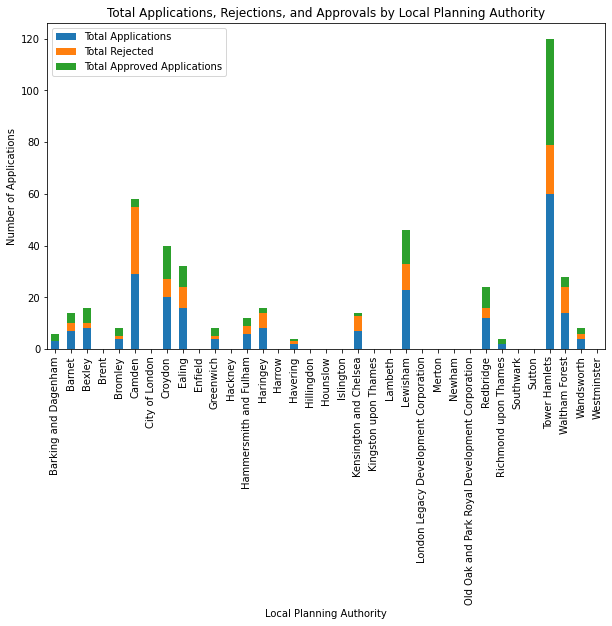

In [32]:
df = pd.read_csv(file)

# Group the data by local planning authority and calculate the sum of total applications, total rejections, and total approvals
grouped_df = df.groupby('Local planning authority')[['Total Applications', 'Total Rejected', 'Total Approved Applications']].sum()

# Create a stacked bar chart
grouped_df.plot(kind='bar', stacked=True, figsize=(10,6))

# Set the title and axis labels
plt.title('Total Applications, Rejections, and Approvals by Local Planning Authority')
plt.xlabel('Local Planning Authority')
plt.ylabel('Number of Applications')

# Show the plot
plt.show()

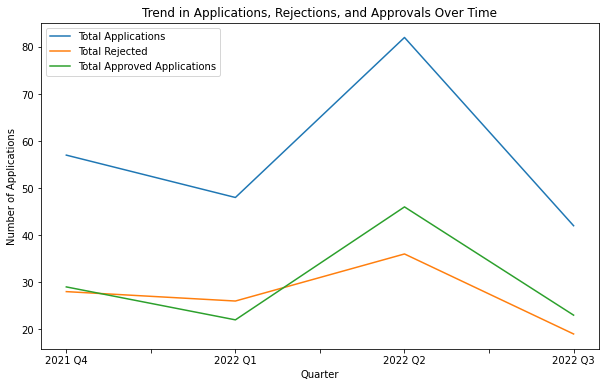

In [33]:
# Group the data by quarter and calculate the sum of total applications, total rejections, and total approvals
grouped_df = df.groupby('Quarter')[['Total Applications', 'Total Rejected', 'Total Approved Applications']].sum()

# Create a line chart
grouped_df.plot(kind='line', figsize=(10,6))

# Set the title and axis labels
plt.title('Trend in Applications, Rejections, and Approvals Over Time')
plt.xlabel('Quarter')
plt.ylabel('Number of Applications')

# Show the plot
plt.show()

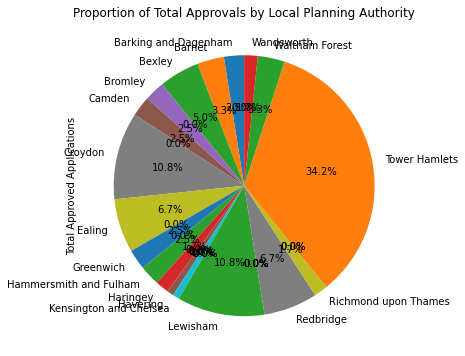

In [34]:
# Group the data by local planning authority and calculate the sum of total approvals
grouped_df = df.groupby('Local planning authority')['Total Approved Applications'].sum()

# Create a pie chart
grouped_df.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Proportion of Total Approvals by Local Planning Authority')

# Show the plot
plt.show()